# Agregación de datos por categoría

In [1]:
import pandas as pd
import numpy as np

In [2]:
gender = ["Male", "Female"]
income = ["Poor", "Middle Class", "Rich"]

In [3]:
n = 500
gender_data = []
income_data = []

for _ in range(0, n):
    gender_data.append(np.random.choice(gender))
    income_data.append(np.random.choice(income))

In [4]:
gender_data[:10]

['Female',
 'Female',
 'Female',
 'Male',
 'Male',
 'Male',
 'Male',
 'Male',
 'Male',
 'Female']

In [5]:
income_data[:10]

['Poor',
 'Rich',
 'Rich',
 'Poor',
 'Poor',
 'Poor',
 'Middle Class',
 'Poor',
 'Rich',
 'Middle Class']

In [6]:
height = np.random.normal(160, 30, size=n)
weight = np.random.normal(65, 25, size=n)
age = np.random.normal(30, 12, size=n)
income = np.random.normal(18000, 3500, size=n)

In [7]:
data = pd.DataFrame(
    {
        "Gender" : gender_data,
        "Economic Status" : income_data,
        "Height" : height,
        "Weight" : weight,
        "Age" : age,
        "Income" : income,
    }   
)

In [12]:
data.head()

,Gender,Economic Status,Height,Weight,Age,Income
0,Female,Rich,211.408939,55.730919,41.085726,20024.341424
1,Female,Rich,139.660691,123.233287,27.760918,19820.687779
2,Female,Poor,180.190363,96.206805,33.195744,11334.337204
3,Male,Rich,160.980196,66.314049,40.416006,15381.188797
4,Male,Rich,169.034512,75.624367,28.248374,16150.086723


In [8]:
data["Age"] = data["Age"].astype(int)

## Agrupación de datos

In [9]:
grouped_gender = data.groupby("Gender")

In [10]:
grouped_gender.groups

{'Female': [0, 1, 2, 9, 10, 11, 13, 16, 18, 19, 22, 23, 24, 27, 29, 30, 31, 34, 36, 38, 39, 43, 44, 46, 47, 48, 49, 52, 53, 54, 56, 57, 58, 59, 60, 61, 63, 64, 66, 68, 71, 74, 75, 77, 79, 83, 85, 86, 87, 88, 89, 91, 92, 93, 95, 97, 99, 100, 103, 104, 105, 106, 107, 108, 109, 111, 112, 114, 116, 117, 118, 119, 121, 124, 126, 128, 130, 131, 132, 134, 137, 139, 140, 141, 142, 143, 144, 146, 148, 150, 151, 154, 156, 157, 168, 170, 177, 182, 185, 188, ...], 'Male': [3, 4, 5, 6, 7, 8, 12, 14, 15, 17, 20, 21, 25, 26, 28, 32, 33, 35, 37, 40, 41, 42, 45, 50, 51, 55, 62, 65, 67, 69, 70, 72, 73, 76, 78, 80, 81, 82, 84, 90, 94, 96, 98, 101, 102, 110, 113, 115, 120, 122, 123, 125, 127, 129, 133, 135, 136, 138, 145, 147, 149, 152, 153, 155, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 169, 171, 172, 173, 174, 175, 176, 178, 179, 180, 181, 183, 184, 186, 187, 192, 194, 199, 200, 201, 202, 203, 206, 208, 209, 210, ...]}

In [21]:
for names, groups in grouped_gender:
    print(names)
    print(groups)


Female
     Gender Economic Status      Height      Weight  Age        Income
0    Female            Rich  211.408939   55.730919   41  20024.341424
1    Female            Rich  139.660691  123.233287   27  19820.687779
2    Female            Poor  180.190363   96.206805   33  11334.337204
5    Female    Middle Class  180.873857   63.418833   32  16977.880643
6    Female            Poor  142.945852   28.379502   27  19199.106476
..      ...             ...         ...         ...  ...           ...
491  Female            Rich  167.081008  102.998687   15  18050.662685
492  Female            Rich  153.051882   49.972636   31  19695.670499
494  Female            Rich  125.383127   37.059510   25  17309.491327
495  Female            Rich  144.262874   99.165861   46  15416.110070
499  Female            Rich  128.443096   58.579077   29  23230.227442

[245 rows x 6 columns]
Male
    Gender Economic Status      Height     Weight  Age        Income
3     Male            Rich  160.980196  66.

In [11]:
grouped_gender.get_group("Female")

,Gender,Economic Status,Height,Weight,Age,Income
0,Female,Poor,180.617165,58.956177,35,17912.699600
1,Female,Rich,133.431043,64.038240,29,20149.206504
2,Female,Rich,191.863332,73.618951,20,22479.361025
9,Female,Middle Class,156.304061,70.242018,38,16050.737901
10,Female,Poor,167.783921,44.339680,27,15885.526241
...,...,...,...,...,...,...
492,Female,Poor,123.458256,41.361375,38,24794.762845
494,Female,Middle Class,207.607977,99.898793,36,15523.818950
495,Female,Rich,78.148984,10.746448,51,16521.289088
497,Female,Rich,207.553549,78.226975,19,16858.557486


In [32]:
data.groupby(["Gender", "Economic Status"]).get_group(("Female", "Middle Class")).shape[0]

77

In [12]:
double_group = data.groupby(["Gender", "Economic Status"])

In [34]:
for names, groups in double_group:
    print(names)
    print(groups)

('Female', 'Middle Class')
     Gender Economic Status      Height      Weight  Age        Income
5    Female    Middle Class  180.873857   63.418833   32  16977.880643
13   Female    Middle Class  144.946566  126.700642   18  19293.549250
26   Female    Middle Class  167.957100   45.674299   44  15436.853740
30   Female    Middle Class  157.055570   60.006659   18  14981.024441
49   Female    Middle Class  194.575511   90.378370   26  18435.337790
..      ...             ...         ...         ...  ...           ...
455  Female    Middle Class  181.651983   44.577401   19  23128.149567
471  Female    Middle Class  128.399982    0.166111   42  19830.324726
475  Female    Middle Class  140.426649   49.711408   52  20255.329013
476  Female    Middle Class  139.919919   70.070757   37  14389.292652
485  Female    Middle Class  138.754279   35.475284   17  20408.634232

[77 rows x 6 columns]
('Female', 'Poor')
     Gender Economic Status      Height      Weight  Age        Income
2    Fem

## Operaciones sobre datos agrupados

In [43]:
double_group.mean()

Height     Weight        Age        Income
Gender Economic Status                                                
Female Middle Class     154.683603  65.003966  28.519481  18473.528879
       Poor             162.592123  63.081161  29.962963  18377.430042
       Rich             156.186108  64.352780  30.758621  18658.610425
Male   Middle Class     155.612986  65.598439  31.977011  17714.915452
       Poor             153.772317  61.548134  28.897436  17463.741681
       Rich             155.799243  66.475960  29.188889  18012.713670

In [46]:
double_group.size()

Gender  Economic Status
Female  Middle Class       77
        Poor               81
        Rich               87
Male    Middle Class       87
        Poor               78
        Rich               90
dtype: int64

In [13]:
grouped_income = double_group["Income"]

In [60]:
grouped_income.describe()

count          mean          std           min  \
Gender Economic Status                                                   
Female Middle Class      77.0  18473.528879  3666.587029   9319.021340   
       Poor              81.0  18377.430042  3738.445028  10750.577081   
       Rich              87.0  18658.610425  3496.842656  10683.557878   
Male   Middle Class      87.0  17714.915452  3835.554281   8848.029623   
       Poor              78.0  17463.741681  3187.741818  11109.329422   
       Rich              90.0  18012.713670  3271.154379  10767.512657   

                                 25%           50%           75%           max  
Gender Economic Status                                                          
Female Middle Class     16147.465687  18467.736974  21220.374635  25755.081415  
       Poor             15833.276759  18957.665892  20894.988167  26964.766319  
       Rich             15958.164362  18657.808629  20652.607677  27157.104436  
Male   Middle Class     14909.895320  17707.903819  20668.938241  27362.149989  
       Poor             14862.649026  16776.233475  19997.206873  25722.887675  
       Rich             15880.179341  18038.732358  20347.603336  24967.613478

In [62]:
double_group.aggregate(
    {
        "Income" : "sum",
        "Age" : "mean",
        "Height" : "std",
    }
)

Income        Age     Height
Gender Economic Status                                    
Female Middle Class     1.422462e+06  28.519481  28.071335
       Poor             1.488572e+06  29.962963  31.288844
       Rich             1.623299e+06  30.758621  31.653058
Male   Middle Class     1.541198e+06  31.977011  26.950715
       Poor             1.362172e+06  28.897436  30.927196
       Rich             1.621144e+06  29.188889  34.370286

In [63]:
double_group.aggregate(
    {
        "Age" : "mean",
        "Height" : lambda h: np.mean(h) / np.std(h),
    }
)

Age    Height
Gender Economic Status                     
Female Middle Class     28.519481  5.546510
       Poor             29.962963  5.228866
       Rich             30.758621  4.962918
Male   Middle Class     31.977011  5.807456
       Poor             28.897436  5.004256
       Rich             29.188889  4.558358

In [64]:
double_group.aggregate(["sum", "mean", "std"])

Height                              Weight  \
                                 sum        mean        std          sum   
Gender Economic Status                                                     
Female Middle Class     11910.637462  154.683603  28.071335  5005.305366   
       Poor             13169.961924  162.592123  31.288844  5109.574029   
       Rich             13588.191372  156.186108  31.653058  5598.691881   
Male   Middle Class     13538.329761  155.612986  26.950715  5707.064202   
       Poor             11994.240700  153.772317  30.927196  4800.754475   
       Rich             14021.931899  155.799243  34.370286  5982.836408   

                                               Age                        \
                             mean        std   sum       mean        std   
Gender Economic Status                                                     
Female Middle Class     65.003966  26.840764  2196  28.519481  13.246261   
       Poor             63.081161  26.161156  2427  29.962963  11.614048   
       Rich             64.352780  24.783621  2676  30.758621  12.707776   
Male   Middle Class     65.598439  26.519444  2782  31.977011  12.767124   
       Poor             61.548134  25.835451  2254  28.897436  12.215160   
       Rich             66.475960  23.853518  2627  29.188889  11.969901   

                              Income                             
                                 sum          mean          std  
Gender Economic Status                                           
Female Middle Class     1.422462e+06  18473.528879  3666.587029  
       Poor             1.488572e+06  18377.430042  3738.445028  
       Rich             1.623299e+06  18658.610425  3496.842656  
Male   Middle Class     1.541198e+06  17714.915452  3835.554281  
       Poor             1.362172e+06  17463.741681  3187.741818  
       Rich             1.621144e+06  18012.713670  3271.154379

In [65]:
double_group.aggregate([lambda x: np.mean(x) / np.std(x)])

Height    Weight       Age    Income
                        <lambda>  <lambda>  <lambda>  <lambda>
Gender Economic Status                                        
Female Middle Class     5.546510  2.437718  2.167140  5.071383
       Poor             5.228866  2.426276  2.595964  4.946423
       Rich             4.962918  2.611638  2.434488  5.366778
Male   Middle Class     5.807456  2.487938  2.519157  4.645381
       Poor             5.004256  2.397733  2.381015  5.513865
       Rich             4.558358  2.802454  2.452185  5.537380

## Filtrado de datos

In [15]:
double_group["Age"].filter(lambda x: x.sum() > 1300)

0      35
1      29
2      20
3      18
4      21
       ..
495    51
496    24
497    19
498    29
499    21
Name: Age, Length: 500, dtype: int64

In [16]:
zscore = lambda x: (x - x.mean()) / x.std()

In [18]:
z_group = double_group.transform(zscore)

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='Age', ylabel='Count'>

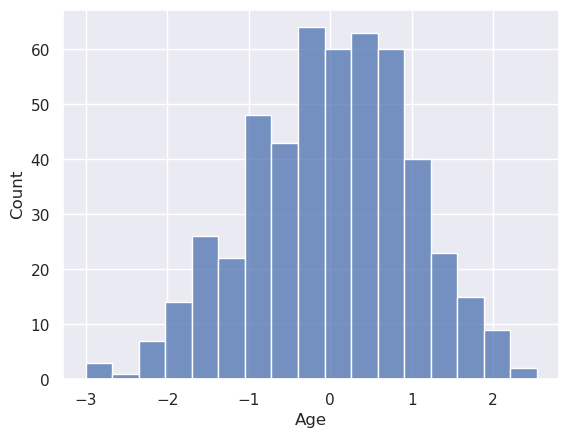

In [20]:
sns.set_theme()
sns.histplot(z_group["Age"])

## Operaciones diversas

In [21]:
double_group.head(1)

,Gender,Economic Status,Height,Weight,Age,Income
0,Female,Poor,180.617165,58.956177,35,17912.699600
1,Female,Rich,133.431043,64.038240,29,20149.206504
3,Male,Poor,166.206210,81.706864,18,18924.101727
6,Male,Middle Class,200.528856,76.804152,58,20087.688322
8,Male,Rich,121.632068,20.956275,22,19695.105686
9,Female,Middle Class,156.304061,70.242018,38,16050.737901


In [29]:
double_group.nth(32)

,Gender,Economic Status,Height,Weight,Age,Income
142,Female,Rich,124.969086,78.999495,38,17136.833012
180,Male,Poor,219.368845,86.243346,10,12900.912839
195,Female,Poor,134.656093,68.530934,40,23703.275210
204,Female,Middle Class,162.089789,73.865591,18,18704.096534
206,Male,Middle Class,116.353498,111.881209,23,17605.165470
290,Male,Rich,145.773931,12.337631,54,15685.385001


In [31]:
double_group.nth(82)

,Gender,Economic Status,Height,Weight,Age,Income
434,Male,Poor,155.618590,36.485470,8,18461.501377
484,Female,Rich,197.725874,84.496878,19,20123.606507
485,Male,Middle Class,161.930419,60.957523,40,17664.530345
494,Female,Middle Class,207.607977,99.898793,36,15523.818950


In [32]:
data_sorted = data.sort_values(["Age", "Income"])

In [33]:
data_sorted.head()

,Gender,Economic Status,Height,Weight,Age,Income
419,Female,Poor,130.732875,66.939017,-6,21811.532771
444,Female,Middle Class,125.588237,33.253331,-4,13208.816111
477,Male,Middle Class,81.114699,91.205306,-2,18544.473960
453,Male,Rich,168.150935,59.426686,0,10489.051920
425,Male,Rich,170.721337,68.821163,2,18016.156055


In [34]:
age_grouped = data_sorted.groupby("Gender")

In [36]:
age_grouped.head()

,Gender,Economic Status,Height,Weight,Age,Income
419,Female,Poor,130.732875,66.939017,-6,21811.532771
444,Female,Middle Class,125.588237,33.253331,-4,13208.816111
477,Male,Middle Class,81.114699,91.205306,-2,18544.473960
453,Male,Rich,168.150935,59.426686,0,10489.051920
425,Male,Rich,170.721337,68.821163,2,18016.156055
399,Male,Rich,124.750227,18.064678,2,18467.374018
458,Male,Rich,147.330389,70.343788,3,14878.678921
326,Female,Poor,162.582046,82.663853,3,15363.301316
88,Female,Middle Class,166.261925,64.493646,3,17715.303048
95,Female,Rich,131.937411,51.918349,3,19251.986500


## Training and testing data split

In [40]:
data_customer = pd.read_csv("datasets/customer-churn-model/Customer-Churn-Model.txt")

In [41]:
len(data_customer)

3333

In [42]:
a = np.random.normal(size=len(data_customer))

In [43]:
a

array([ 1.49842629, -0.21542415, -1.22786759, ...,  0.84295351,
        0.30172551,  0.53383854])

In [45]:
check = (a < 0.8)
check

array([False,  True,  True, ..., False,  True,  True])

<Axes: ylabel='Count'>

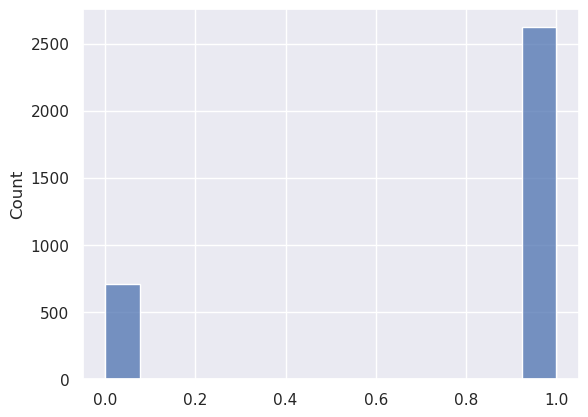

In [46]:
sns.histplot(check)

In [47]:
training = data_customer[check]
testing = data_customer[~check]

In [51]:
from sklearn.model_selection import train_test_split

In [52]:
train, test = train_test_split(data_customer, test_size=0.2)

In [54]:
len(train), len(test)

(2666, 667)

In [55]:
import sklearn.utils as utils
utils.shuffle(data_customer)

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
142,MI,157,415,381-4756,no,yes,28,192.6,107,32.74,...,74,16.62,109.7,139,4.94,6.8,5,1.84,3,False.
1678,VT,64,408,349-2157,no,no,0,145.5,116,24.74,...,110,19.41,273.4,91,12.30,8.9,8,2.40,1,False.
552,GA,44,510,419-8987,no,no,0,288.1,112,48.98,...,92,21.93,192.4,90,8.66,10.2,4,2.75,3,True.
1983,SC,114,510,364-9425,no,yes,4,141.3,96,24.02,...,88,19.58,223.7,85,10.07,9.4,3,2.54,3,False.
1903,NJ,93,510,384-5632,yes,yes,38,225.7,117,38.37,...,122,10.17,193.2,125,8.69,14.0,7,3.78,1,True.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1880,CT,56,415,406-3069,no,no,0,162.3,99,27.59,...,78,12.67,255.5,115,11.50,14.8,1,4.00,4,True.
387,NH,54,510,353-3351,no,no,0,210.5,102,35.79,...,83,17.38,127.8,53,5.75,8.5,5,2.30,1,False.
2674,IL,67,415,369-4377,no,no,0,109.1,117,18.55,...,124,18.48,188.4,141,8.48,12.8,6,3.46,0,False.
2358,KY,71,415,414-5422,no,no,0,104.0,92,17.68,...,125,16.75,110.1,123,4.95,14.6,8,3.94,0,False.
